# The classical Helium Atom

Necessary libraries are imported.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Part a) Motion of the two electrons

In this assignment, the motion of the nucleus is neglected, and the equations of motion of the two electrons are given by:
        $$ \vec{a_1} = -2 \frac{\vec{r_1}}{r_1^3} + \frac{\vec{r_1}-\vec{r_2}}{r_{12}^3} $$
        $$ \vec{a_2} = -2 \frac{\vec{r_2}}{r_2^3} + \frac{\vec{r_2}-\vec{r_1}}{r_{12}^3} $$

These two second-order differential equations are separated into four first-order differential equations as:
        $$ \frac{d\vec{v_1}}{dt} = -2 \frac{\vec{r_1}}{r_1^3} + \frac{\vec{r_1}-\vec{r_2}}{r_{12}^3} $$
        $$ \frac{d\vec{v_2}}{dt} = -2 \frac{\vec{r_2}}{r_2^3} + \frac{\vec{r_2}-\vec{r_1}}{r_{12}^3} $$
        $$ \frac{d\vec{r_1}}{dt} = \vec{v_1} $$
        $$ \frac{d\vec{r_2}}{dt} = \vec{v_2} $$

Euler algorithm is then implemented to numerically determine the positions and velocities of the two electrons. This is done by the function ThreeBodyEuler, which implements the Euler algorithm and stores the results in a 2D array, whose $n^{th}$ column represents the position or velocity vector after n time steps. The function PlotPosition can be called to produce two graphs showing the distance of the two electrons from the nucleus and their positions.

In [15]:
# Function to compute the acceleration
def compute_accelerations(r1, r2):
    r1_norm = np.linalg.norm(r1)
    r2_norm = np.linalg.norm(r2)
    r12 = r1 - r2
    r12_norm = np.linalg.norm(r12)

    # Compute the accelerations using the given formulas
    a1 = -2 * r1 / r1_norm**3 + r12 / r12_norm**3
    a2 = -2 * r2 / r2_norm**3 - r12 / r12_norm**3

    return a1, a2

# Euler method implementation
def euler_method(r1_0, r2_0, v1_0, v2_0, dt, n_steps):
    # Initialize arrays to store positions and velocities
    r1_values = np.zeros((n_steps, 2))
    r2_values = np.zeros((n_steps, 2))
    v1_values = np.zeros((n_steps, 2))
    v2_values = np.zeros((n_steps, 2))
    
    # Set initial conditions
    r1 = np.array(r1_0)
    r2 = np.array(r2_0)
    v1 = np.array(v1_0)
    v2 = np.array(v2_0)
    
    # Store initial values
    r1_values[0, :] = r1
    r2_values[0, :] = r2
    v1_values[0, :] = v1
    v2_values[0, :] = v2
    
    # Time-stepping loop
    for i in range(1, n_steps):
        # Compute accelerations at the current step
        a1, a2 = compute_accelerations(r1, r2)
        
        # Update velocities and positions using the Euler method
        v1 = v1 + dt * a1
        v2 = v2 + dt * a2
        r1 = r1 + dt * v1
        r2 = r2 + dt * v2
        
        # Store updated values
        r1_values[i, :] = r1
        r2_values[i, :] = r2
        v1_values[i, :] = v1
        v2_values[i, :] = v2
    
    return r1_values, r2_values, v1_values, v2_values


def PlotPosition(r1_0, r2_0, v1_0, v2_0, dt, n_steps):
    t = np.linspace(0,dt*n_steps,n_steps)
    r1,r2,v1,v2 = euler_method(r1_0, r2_0, v1_0, v2_0, dt, n_steps)
    
    #calculate distance from nucleus
    r1_norm = np.zeros(len(t))
    r2_norm = np.zeros(len(t))
    for i in range(len(t)):
        r1_norm[i] = np.linalg.norm(r1[i,:])
        r2_norm[i] = np.linalg.norm(r2[i,:])
        
    #plot distance from nucleus against time
    plt.figure()
    plt.plot(t,r1_norm,color='orangered',label='Distance of first electron from nucleus')
    plt.plot(t,r2_norm,color='cornflowerblue',label='Distance of second electron from nucleus')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Distance')
    plt.show()
    
    #plot the trajectories of the two electrons
    plt.figure()
    plt.plot(r1[:,0],r1[:,1],color='orangered',label='Trajectory of first electron')
    plt.plot(r2[:,0],r2[:,1],color='cornflowerblue',label='Trajectory of second electron')
    plt.grid()
    plt.scatter(0,0,s=50,color='k',label='Position of nucleus')
    plt.scatter(r1[-1,0],r1[-1,1],color='orangered',s=10)
    plt.scatter(r2[-1,0],r2[-1,1],color='cornflowerblue',s=10)
    plt.legend()
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.show()
    return


## Part b) Simulation of the Helium atom with known initial positions and velocities of electrons

The functions defined above are called to plot the time evolution of distance from nucleus and the trajectories of the two electrons, with initial positions and velocities of $\vec{r_1} = (2, 0)$, $\vec{r_2} = (-1, 0)$, $\vec{v_1} = (0, 0.95)$, $\vec{v_2} = (0, -1)$. Time step of 0.01 is chosen.

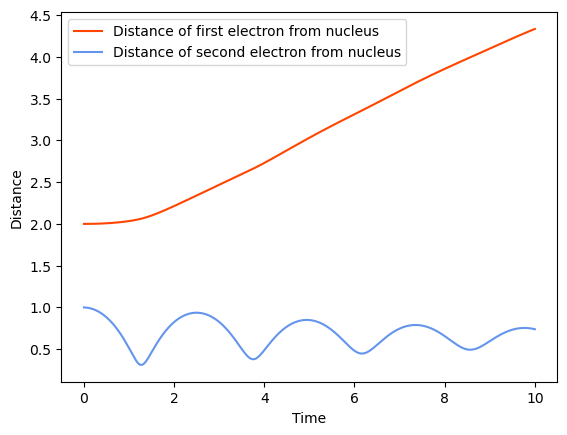

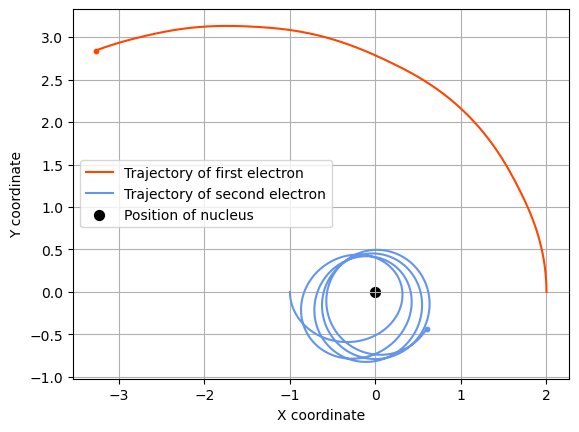

In [14]:
# Parameters
dt = 0.01   # Time step
n_steps = 1000  # Number of steps

# Initial conditions
r1_0 = [2.0, 0.0]  # Initial position of electron 1
r2_0 = [-1.0, 0.0] # Initial position of electron 2
v1_0 = [0.0, 0.95]  # Initial velocity of electron 1
v2_0 = [0.0, -1.] # Initial velocity of electron 2

# Run the simulation using the Euler method
r1_values, r2_values, v1_values, v2_values = euler_method(r1_0, r2_0, v1_0, v2_0, dt, n_steps)

PlotPosition(r1_0, r2_0, v1_0, v2_0, dt, n_steps)